In [2]:
import os
import os.path as osp
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%matplotlib widget
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Times"],
    'font.size': 14,
})

In [3]:
def get_time_from_filename(file):
    """Retrieves an epoch time from a file name in seconds"""
    tstr = str(Path(file).stem)
    gpstime = float(tstr)
    timeconvert = 1e-6
    if len(tstr) != 16 and len(tstr) > 10:
        timeconvert = 10**(-1 * (len(tstr) - 10))
    return gpstime * timeconvert

def load_lidar(path):
    """Loads a pointcloud (np.ndarray) (N, 6) from path [x, y, z, intensity, velocity, time]"""
    # dtype MUST be float32 to load this properly!
    points = np.fromfile(path, dtype=np.float32).reshape((-1, 7)).astype(np.float64)
    t = get_time_from_filename(path)
    points[:, 5] += t
    return points

root = "/home/yuchen/ASRL/data/boreas/sequences/boreas-2022-07-19-15-52/aeva"
ext = ".bin"
framenames = sorted([f for f in os.listdir(root) if f.endswith(ext)])
print(len(framenames))
framenames = framenames[:100]


994


In [1]:
# plot based on point times
num_segments = 10
result = np.zeros((len(framenames), num_segments))
num_points = np.zeros_like(result)
timegap = np.linspace(0, 1, num_segments+1)
# print(timegap)

for i, framename in enumerate(framenames):
  points = load_lidar(osp.join(root, framename))
  # print(points.shape)
  tmin = np.min(points[:, 5])
  tmax = np.max(points[:, 5])
  points[:, 5] = (points[:, 5] - tmin) / (tmax - tmin)

  for point in points:
    segment = int(point[5] * num_segments)
    segment = min(segment, num_segments-1)
    result[i, segment] += point[4]
    num_points[i, segment] += 1.0

result /= num_points

fig, ax = plt.subplots(1, 1, figsize=(12, 12))
for i in range(num_segments):
  ax.plot(result[:, i], label=f"{timegap[i]:.2f}-{timegap[i+1]:.2f}")

ax.set_xlabel('time [s]')
ax.set_ylabel('radial velocity [m/s]')
ax.legend()

plt.show()

NameError: name 'np' is not defined

In [ ]:
# plot based on point times
num_segments = 500
result = np.zeros((num_segments,))
num_points = np.zeros_like(result)
timegap = np.linspace(0, 1, num_segments+1)
# print(timegap)

for i, framename in enumerate(framenames):
  points = load_lidar(osp.join(root, framename))
  # print(points.shape)
  tmin = np.min(points[:, 5])
  tmax = np.max(points[:, 5])
  points[:, 5] = (points[:, 5] - tmin) / (tmax - tmin)

  for point in points:
    segment = int(point[5] * num_segments)
    segment = min(segment, num_segments-1)
    result[segment] += point[4]
    num_points[segment] += 1.0

result /= num_points

fig, ax = plt.subplots(1, 1, figsize=(12, 6))
ax.plot(timegap[:-1], result)

ax.set_xlabel('relative time ($(t-begin)/(end-begin)$)')
ax.set_ylabel('radial velocity [m/s]')
# ax.legend()

plt.show()

/tmp/ipykernel_1156965/3444493297.py:21: RuntimeWarning: invalid value encountered in divide
  result /= num_points


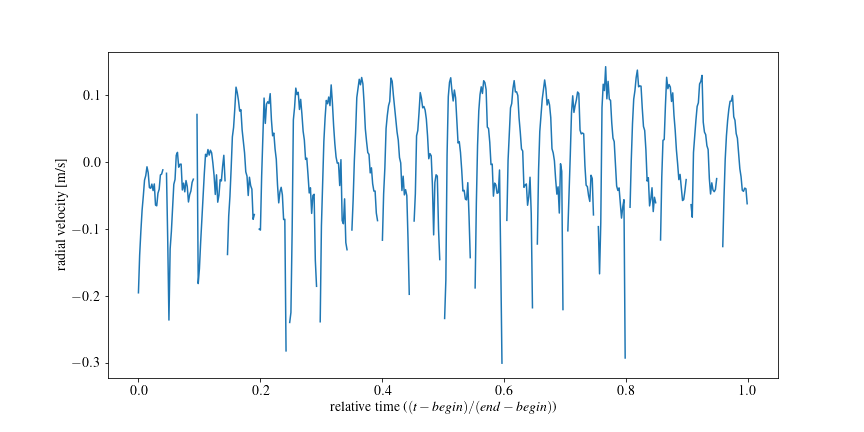

In [5]:
# plot based on point times
num_segments = 500
result = np.zeros((num_segments,))
num_points = np.zeros_like(result)
timegap = np.linspace(0, 1, num_segments+1)
# print(timegap)

for i, framename in enumerate(framenames):
  points = load_lidar(osp.join(root, framename))
  points = points[np.where(points[:, 6] == 3.0)]
  tmin = np.min(points[:, 5])
  tmax = np.max(points[:, 5])
  points[:, 5] = (points[:, 5] - tmin) / (tmax - tmin)

  for point in points:
    segment = int(point[5] * num_segments)
    segment = min(segment, num_segments-1)
    result[segment] += point[4]
    num_points[segment] += 1.0

result /= num_points

fig, ax = plt.subplots(1, 1, figsize=(12, 6))
ax.plot(timegap[:-1], result)

ax.set_xlabel('relative time ($(t-begin)/(end-begin)$)')
ax.set_ylabel('radial velocity [m/s]')
# ax.legend()

plt.show()

In [ ]:
# plot based on point times
num_segments = 500
result = np.zeros((num_segments,))
num_points = np.zeros_like(result)
timegap = np.linspace(0, 1, num_segments+1)
# print(timegap)

for i, framename in enumerate(framenames):
  points = load_lidar(osp.join(root, framename))
  # print(points.shape)
  tmin = np.min(points[:, 5])
  tmax = np.max(points[:, 5])
  points[:, 5] = (points[:, 5] - tmin) / (tmax - tmin)

  for point in points:
    segment = int(point[5] * num_segments)
    segment = min(segment, num_segments-1)
    result[segment] += np.norm(point[:3])
    num_points[segment] += 1.0

result /= num_points

fig, ax = plt.subplots(1, 1, figsize=(12, 6))
ax.plot(timegap[:-1], result)

ax.set_xlabel('relative time ($(t-begin)/(end-begin)$)')
ax.set_ylabel('radial velocity [m/s]')
# ax.legend()

plt.show()